![BTS](https://github.com/vfp1/bts-dsf-2020/blob/main/Logo-BTS.jpg?raw=1)

# FINAL PROJECT

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Data Science Foundations (2020-10-29)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-dsf-2020/blob/main/Final_project/DSF_FINAL_PROJECT.ipynb)

# Regarding the final project for the class

The final project for the class will need to draw from everything you have covered in class, at least everything relevant for your final project. For that you will need to choose a topic. You will be using **the image and text** datasets that we have seen on our sessions. 

It doesn't need to be a super revolutionary idea, but at least have in mind the issue of reducing the time between information and action. And you will need to send it to me. 

The project will need to contain the following steps:

1. Ingesting, exploring and cleaning data for your project
2. Choosing/testing of algorithm approach
3. Visualizing the results
4. Packaging the project into a product

You will be using code from class to support you on the second, third and forth parts of the project. 

I am not looking for excellence, and I do not mind that you copy/paste code, but always try to understand why. 

In [76]:
!python -m spacy download en_core_web_sm
!python -m spacy download en_core_web_md


Traceback (most recent call last):
  File "/usr/lib/python3.6/subprocess.py", line 289, in call
    return p.wait(timeout=timeout)
  File "/usr/lib/python3.6/subprocess.py", line 1477, in wait
    (pid, sts) = self._try_wait(0)
  File "/usr/lib/python3.6/subprocess.py", line 1424, in _try_wait
    (pid, sts) = os.waitpid(self.pid, wait_flags)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/spacy/__main__.py", line 33, in <module>
    plac.call(commands[command], sys.argv[1:])
  File "/usr/local/lib/python3.6/dist-packages/plac_core.py", line 367, in call
    cmd, result = parser.consume(arglist)
  File "/usr/local/lib/python3.6/dist-packages/plac_core.py", line 232, in consume
    ret

In [ ]:
!pip3 install flair

     |████████████████████████████████| 450kB 8.4MB/s 
     |████████████████████████████████| 798kB 14.7MB/s 
     |████████████████████████████████| 983kB 24.3MB/s 
     |████████████████████████████████| 1.3MB 29.4MB/s 
     |████████████████████████████████| 1.1MB 34.1MB/s 
     |████████████████████████████████| 71kB 7.6MB/s 
     |████████████████████████████████| 19.7MB 259kB/s 
     |████████████████████████████████| 2.9MB 31.6MB/s 
     |████████████████████████████████| 890kB 43.9MB/s 
  Created wheel for mpld3: filename=mpld3-0.3-cp36-none-any.whl size=116679 sha256=27b0db3655ef0e168f39c8a4a2b2c4f82400dafda03165e416198aa5768a6d1b
  Stored in directory: /root/.cache/pip/wheels/c0/47/fb/8a64f89aecfe0059830479308ad42d62e898a3e3cefdf6ba28
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993193 sha256=a1064f315c9c5f7426809185ef0d4d17b6d316cad9f98585b395090f0d323903
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6

In [ ]:
!python -m spacy download en_core_web_lg

In [ ]:
import spacy
import nltk
from spacy.pipeline import SentenceSegmenter
import pandas as pd 
import numpy as np


nlp_md = spacy.load('en_core_web_lg')

In [ ]:
book1 = open('/content/New Text Document.txt', 'r').read()

In [ ]:
book1

In [ ]:
book1 = book1.replace("\n",'')


In [ ]:
book1 = book.replace("\n",'')
sentences  = book1.split('.')

df_tokens = pd.DataFrame((np.zeros((100,1550))))
for i , t in enumerate(sentences):
   doc = nlp_md(t)
   df_tokens[i].update(doc)


In [ ]:
from flair.models import TextClassifier
from flair.data import Sentence
tagger = TextClassifier.load('sentiment')


In [ ]:
df_sentement = pd.DataFrame((np.zeros((100,20000))))
for i , t in enumerate(sentences):
  s = Sentence(t)
  tagger.predict(s)
  df_sentement[i].update(s.labels)
df_sentement

In [ ]:
df_ent = pd.DataFrame((np.zeros((100,20000))))
for i , t in enumerate(sentences):
  doc = nlp_md(t)
  df_ent[i].update(doc.ents)
df_ent

In [ ]:
l = []
for i , x in enumerate(df_sentement.iloc[0,:]):
  try:
    if str(x.value) == 'NEGATIVE':
      p = x.score * (-1)
    else:
      p = x.score
    l.append(p)
  except:
    pass
l = pd.DataFrame(l)
l['Moving'] = l[0].rolling(20).mean()

In [ ]:
l

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize = (30,10))
plt.style.use("seaborn")
plt.plot(l['Moving'])

In [ ]:
d_ents = df_ent.values.flatten()
df_ents = pd.DataFrame(d_ents)

df_ents['index'] = (df_ents.index / 100)
df_ents['index'] = df_ents['index'].apply(np.floor)
indexNames = df_ents[~(df_ents[0] != 0)].index 
df_ents.drop(indexNames , inplace=True)

df_ents['name'] = 0
df_ents['type'] = 0

In [ ]:
for i , item in enumerate(df_ents.iloc[:,0]):
  df_ents['name'].iloc[i] = item.text
  df_ents['type'].iloc[i]  = item.label_

In [ ]:
indexNames = df_ents[~(df_ents['type'] != 'CARDINAL')].index 
df_ents.drop(indexNames , inplace=True)

In [ ]:
bar = df_ents['type'].value_counts().head(10)
plt.figure(figsize= (30,10))
plt.bar(bar.index , bar)

In [ ]:
bar = df_ents['name'].value_counts().head(10)
plt.figure(figsize= (30,10))
plt.bar(bar.index , bar)

In [ ]:
v = df_ents['name'].value_counts().head(10).index

In [ ]:
from collections import defaultdict
indexes = defaultdict(list)
for i , ent in enumerate(df_ents.iloc[:,0]):
        indexes[ent.text].append(df_ents['index'].iloc[i])
  

In [ ]:
  fig, axes = plt.subplots(len(v), sharex=True)
for index, name in enumerate(v):
    axes[index].eventplot(indexes[name], label=name, color="C{}".format(index))
    axes[index].get_yaxis().set_visible(False)
fig.legend()
plt.plot(l['Moving'])

In [ ]:
plt.plot(l['Moving'])

In [ ]:
pd.Series(sentences)

Load Books

In [ ]:
book = open('/content/Beyond good and Evil.txt', 'r').read()

Run Sentimental Analysis 

In [ ]:
#split book into sentences 
book = book.replace("\n",'')
sentences  = book.split('.')


# Run Sentiment analysis on all sentences
from flair.models import TextClassifier
from flair.data import Sentence
tagger = TextClassifier.load('sentiment')
df_sentement = pd.DataFrame((np.zeros((10,1550))))
for i , t in enumerate(sentences):
  s = Sentence(t)
  tagger.predict(s)
  df_sentement[i].update(s.labels)


Draw 


In [ ]:



l = []
for i , x in enumerate(df_sentement.iloc[0,:]):
  try:
    if str(x.value) == 'NEGATIVE':
      p = x.score * (-1)
    else:
      p = x.score
    l.append(p)
  except:
    pass
l = pd.DataFrame(l)
l['Major'] = l[0].rolling(40).mean()
l['Minor'] = l[0].rolling(10).mean()

import matplotlib.pyplot as plt
plt.style.use("seaborn")
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))
axes[0].plot(l['Major'])
axes[1].plot(l['Minor'])

In [ ]:
docs = [nlp_md(text) for text in (sentences[:20])]

In [ ]:
from collections import Counter
from spacy.lang.en.stop_words import STOP_WORDS
def tf(word, doc):
    counts = Counter(lemmatize(doc))
    return counts[word]


def idf(word, docs):
    count = 0
    for doc in docs:
        if word in lemmatize(doc):
            count += 1
    return count / len(docs)
def lemmatize(doc):
  return [token.lemma_ for token in doc if not
          (token.is_punct or token.is_space or token.lower_ in STOP_WORDS)]



def tf_idf(word, doc, docs):
    return tf(word, doc) * idf(word, docs)
def all_lemmas(docs):
    lemmas = set()
    for doc in docs:
      lemmas.update(lemmatize(doc))
    return lemmas
def tf_idf_doc(doc, docs):
    lemmas = all_lemmas(docs)
    res = {}
    for lemma in lemmas:
        res[lemma] = tf_idf(lemma, doc, docs)
    return res

    import pandas as pd

def tf_idf_scores(docs):
    lemmas = all_lemmas(docs)
    rows = []
    for doc in docs:
        rows.append(tf_idf_doc(doc, docs))

    return pd.DataFrame(rows)

tb = tf_idf_scores(docs)
tb / tb.max().max()


In [ ]:
book = book.replace("\n",'')
chapter = book.split('CHAPTER')

chapters  = [nlp_md(text) for text in (chapter)]

In [ ]:
tb = tf_idf_scores(docs)
tb / tb.max().max()
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(40, 20))
sns.heatmap(tb / tb.max().max(), cmap="RdYlGn_r", annot=False);

In [ ]:
chapter = book.split('CHAPTER')

sentences = chapter[1].split('.')
len(sentences)

In [ ]:
sentences  = [nlp_md(text) for text in (sentences)]
tb = tf_idf_scores(sentences)

In [ ]:
tb / tb.max().max()
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(40, 20))
sns.heatmap(tb / tb.max().max(), cmap="RdYlGn_r", annot=False);

In [ ]:
import matplotlib.pyplot as pPlot
from wordcloud import WordCloud, STOPWORDS
import numpy as npy
from PIL import Image
dataset = open("sampleWords.txt", "r").read()
defcreate_word_cloud(string):
  maskArray = npy.array(Image.open("cloud.png"))
  cloud = WordCloud(background_color = "white", max_words = 200, mask = maskArray, stopwords = set(STOPWORDS))
  cloud.generate(string)
  cloud.to_file("wordCloud.png")
dataset = dataset.lower()
create_word_cloud(dataset)

In [ ]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline
stopwords = set(STOPWORDS)

In [ ]:
for i in range(1,10):
  wordcloud = WordCloud(max_words=100 , max_font_size=40 , stopwords = STOP_WORDS).generate(chapter[i])
  plt.figure(figsize=(20,10))
  plt.imshow(wordcloud)
  plt.title(i)
  plt.axis("off")
  plt.show()

In [ ]:
for i , item in enumerate(chapter):
  print(item)

In [ ]:
len(chapter)


In [ ]:
y_train

Detect Emotions



In [101]:
import pandas as pd 
from sklearn.model_selection import train_test_split

df_train = pd.read_csv('/content/train.txt', header =None, sep =';', names = ['Input','Sentiment'], encoding='utf-8')
df_test = pd.read_csv('/content/test.txt', header = None, sep =';', names = ['Input','Sentiment'],encoding='utf-8')
df = pd.concat([df_train,df_test])



df['Sentiment'].value_counts()





joy         6057
sadness     5247
anger       2434
fear        2161
love        1463
surprise     638
Name: Sentiment, dtype: int64

In [102]:

X = df['Input']
ylabels = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.1, random_state=42)

y_train.value_counts()

joy         5468
sadness     4701
anger       2184
fear        1967
love        1308
surprise     572
Name: Sentiment, dtype: int64

Clean the test and transform it 


In [103]:
from sklearn.base import TransformerMixin 

# This function will clean the text
def clean_text(text):     
    return text.strip().lower()
    
#Custom transformer using Python standard library (you could use spacy as well)
class predictors(TransformerMixin):

    def transform(self, X, **transform_params):
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = spacy.load('en')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import numpy as np
clf = MLPClassifier()

In [134]:
from sklearn.feature_extraction.text import CountVectorizer

# We create our bag of words (bow) using our tokenizer and defining an ngram range
bow = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1)) 

In [135]:
from sklearn.pipeline import Pipeline



pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow),
                 ('classifier', clf)], verbose=True)

In [136]:
pipe.fit( X_train , y_train ) 

[Pipeline] ........... (step 1 of 3) Processing cleaner, total=   0.0s
[Pipeline] ........ (step 2 of 3) Processing vectorizer, total=   1.8s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=  23.4s


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Pipeline(memory=None,
         steps=[('cleaner', <__main__.predictors object at 0x7f58e28bb6a0>),
                ('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 t...
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                   

In [142]:
# Predicting with a test dataset
sample_prediction = pipe.predict(X_test)

Accuracy: 0.885
Predicted  anger  fear  joy  love  sadness  surprise
Actual                                              
anger        213     7    9     3       18         0
fear           9   153    8     3       15         6
joy            4     2  543    22       16         2
love           1     0   25   123        6         0
sadness       11     6   11     3      515         0
surprise       0    12    3     1        4        46


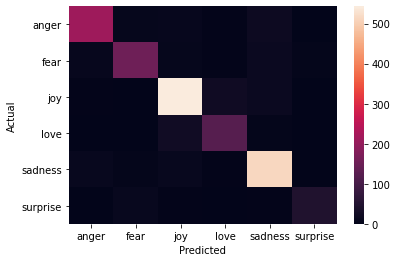

In [143]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt


# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, sample_prediction))
confusion_matrix = pd.crosstab(y_test, sample_prediction, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)
sns.heatmap(confusion_matrix)
plt.show()

Optimize Model 

In [139]:
def Optimize_model(i):
  result = []
  for i in range(10,i,10):

    clf = RandomForestClassifier(n_estimators=i)
    pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow),
                 ('classifier', clf)], verbose=True)
    pipe.fit( X_train , y_train ) 
    sample_prediction = pipe.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, sample_prediction)
    result.append([i,accuracy])
    print('')
    print('')
    print('')
    print(i)
    print("Accuracy:",metrics.accuracy_score(y_test, sample_prediction))
    confusion_matrix = pd.crosstab(y_test, sample_prediction, rownames=['Actual'], colnames=['Predicted'])
    RandomForestClassifier

    print(confusion_matrix)
    sns.heatmap(confusion_matrix)
    plt.show()
  return result


[Pipeline] ........... (step 1 of 3) Processing cleaner, total=   0.0s
[Pipeline] ........ (step 2 of 3) Processing vectorizer, total=   2.0s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   2.3s



10
Accuracy: 0.865
Predicted  anger  fear  joy  love  sadness  surprise
Actual                                              
anger        224     5    8     2       11         0
fear          14   156    2     3       11         8
joy            7     5  522    31       22         2
love           2     1   29   119        4         0
sadness       19     9   17     5      494         2
surprise       1    14    5     1        3        42


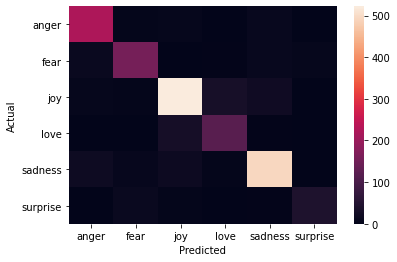

[Pipeline] ........... (step 1 of 3) Processing cleaner, total=   0.0s
[Pipeline] ........ (step 2 of 3) Processing vectorizer, total=   1.8s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   4.6s



20
Accuracy: 0.8677777777777778
Predicted  anger  fear  joy  love  sadness  surprise
Actual                                              
anger        226     2   10     2       10         0
fear          11   162    0     1       11         9
joy            7     7  523    29       20         3
love           2     0   32   116        5         0
sadness       21    13   16     3      489         4
surprise       0    15    3     0        2        46


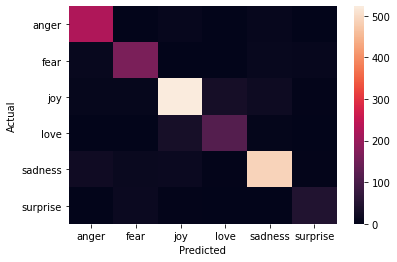

[Pipeline] ........... (step 1 of 3) Processing cleaner, total=   0.0s
[Pipeline] ........ (step 2 of 3) Processing vectorizer, total=   1.8s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   6.8s



30
Accuracy: 0.8705555555555555
Predicted  anger  fear  joy  love  sadness  surprise
Actual                                              
anger        223     4   11     2       10         0
fear           9   165    5     1       10         4
joy            5     7  520    29       25         3
love           2     0   31   117        5         0
sadness       17    11   10     4      500         4
surprise       0    17    4     1        2        42


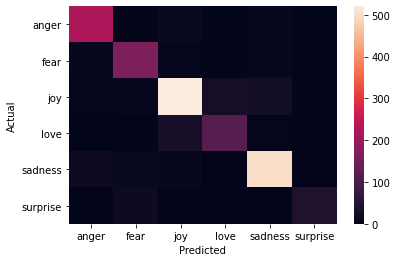

[Pipeline] ........... (step 1 of 3) Processing cleaner, total=   0.0s
[Pipeline] ........ (step 2 of 3) Processing vectorizer, total=   1.8s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   9.0s



40
Accuracy: 0.8722222222222222
Predicted  anger  fear  joy  love  sadness  surprise
Actual                                              
anger        225     4   10     1        9         1
fear          11   159    2     1       13         8
joy            7     7  522    30       20         3
love           2     0   25   122        6         0
sadness       21    10   10     5      497         3
surprise       0    15    3     1        2        45


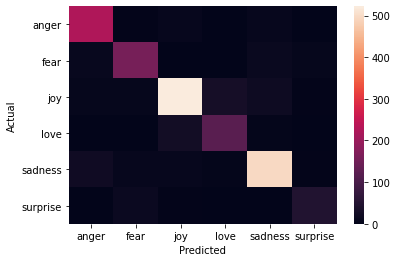

[Pipeline] ........... (step 1 of 3) Processing cleaner, total=   0.0s
[Pipeline] ........ (step 2 of 3) Processing vectorizer, total=   1.9s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=  11.2s



50
Accuracy: 0.88
Predicted  anger  fear  joy  love  sadness  surprise
Actual                                              
anger        229     4    8     1        7         1
fear          11   163    2     2        8         8
joy            5     6  525    29       21         3
love           2     0   29   118        6         0
sadness       22    10    4     3      506         1
surprise       0    17    3     1        2        43


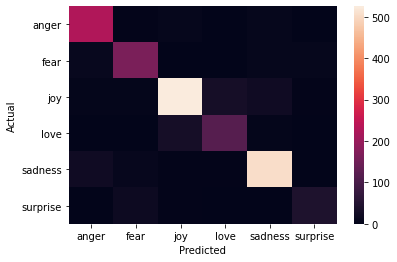

[Pipeline] ........... (step 1 of 3) Processing cleaner, total=   0.0s
[Pipeline] ........ (step 2 of 3) Processing vectorizer, total=   1.8s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=  13.7s



60
Accuracy: 0.8733333333333333
Predicted  anger  fear  joy  love  sadness  surprise
Actual                                              
anger        227     4    8     1        9         1
fear          10   161    3     1       12         7
joy            6     5  524    30       21         3
love           2     1   31   116        5         0
sadness       20     8   12     4      499         3
surprise       0    15    4     1        1        45


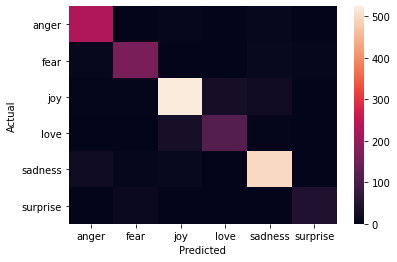

[Pipeline] ........... (step 1 of 3) Processing cleaner, total=   0.0s
[Pipeline] ........ (step 2 of 3) Processing vectorizer, total=   1.8s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=  15.9s



70
Accuracy: 0.875
Predicted  anger  fear  joy  love  sadness  surprise
Actual                                              
anger        227     4    7     1       11         0
fear          12   164    0     1       11         6
joy            6     5  522    31       21         4
love           1     2   30   116        6         0
sadness       16    11    8     4      503         4
surprise       0    17    3     1        2        43


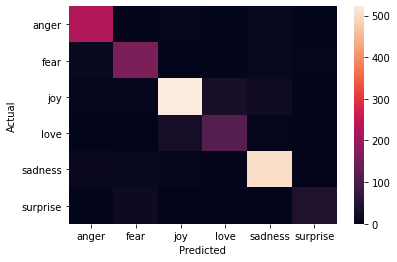

[Pipeline] ........... (step 1 of 3) Processing cleaner, total=   0.0s
[Pipeline] ........ (step 2 of 3) Processing vectorizer, total=   1.8s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=  17.9s



80
Accuracy: 0.8744444444444445
Predicted  anger  fear  joy  love  sadness  surprise
Actual                                              
anger        227     4    8     2        8         1
fear          11   160    1     1       12         9
joy            6     6  523    28       23         3
love           2     0   29   119        5         0
sadness       16    11    9     5      502         3
surprise       0    17    3     1        2        43


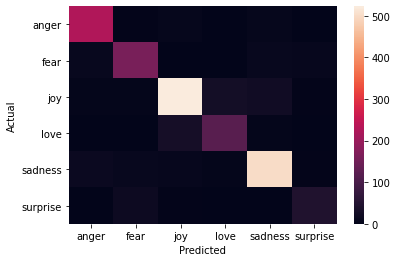

[Pipeline] ........... (step 1 of 3) Processing cleaner, total=   0.0s
[Pipeline] ........ (step 2 of 3) Processing vectorizer, total=   1.8s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=  20.3s



90
Accuracy: 0.8738888888888889
Predicted  anger  fear  joy  love  sadness  surprise
Actual                                              
anger        224     6    9     1        9         1
fear           8   164    3     1       11         7
joy            6     6  521    32       20         4
love           2     0   29   118        6         0
sadness       18    11    7     4      502         4
surprise       0    16    3     1        2        44


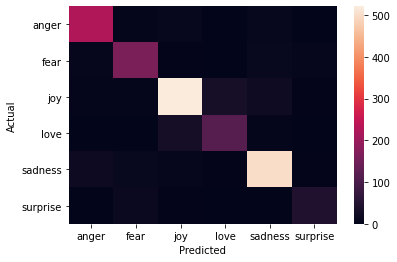

[Pipeline] ........... (step 1 of 3) Processing cleaner, total=   0.0s
[Pipeline] ........ (step 2 of 3) Processing vectorizer, total=   1.8s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=  22.5s



100
Accuracy: 0.8766666666666667
Predicted  anger  fear  joy  love  sadness  surprise
Actual                                              
anger        228     4    8     1        9         0
fear          11   161    1     1       12         8
joy            6     5  525    30       20         3
love           2     0   29   118        6         0
sadness       18     8    9     4      502         5
surprise       0    16    4     1        1        44


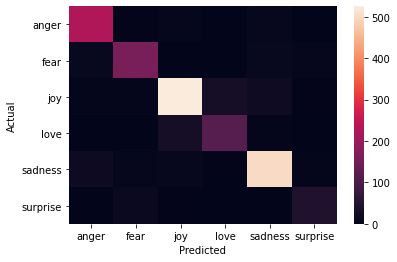

[Pipeline] ........... (step 1 of 3) Processing cleaner, total=   0.0s
[Pipeline] ........ (step 2 of 3) Processing vectorizer, total=   1.8s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=  24.7s



110
Accuracy: 0.8788888888888889
Predicted  anger  fear  joy  love  sadness  surprise
Actual                                              
anger        228     4    9     1        8         0
fear          10   163    1     1       10         9
joy            6     5  525    28       22         3
love           2     0   30   118        5         0
sadness       20     9    6     4      503         4
surprise       0    16    3     0        2        45


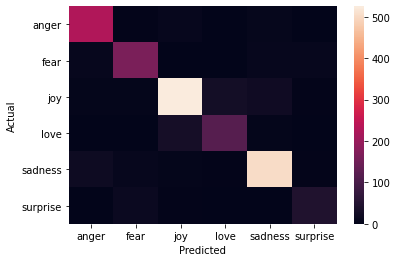

[Pipeline] ........... (step 1 of 3) Processing cleaner, total=   0.0s
[Pipeline] ........ (step 2 of 3) Processing vectorizer, total=   1.8s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=  27.1s



120
Accuracy: 0.8766666666666667
Predicted  anger  fear  joy  love  sadness  surprise
Actual                                              
anger        227     4    9     1        8         1
fear          11   165    1     1       10         6
joy            6     5  518    33       24         3
love           2     0   28   119        6         0
sadness       17    12    6     4      504         3
surprise       0    15    3     1        2        45


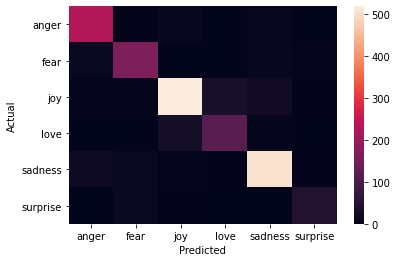

[Pipeline] ........... (step 1 of 3) Processing cleaner, total=   0.0s
[Pipeline] ........ (step 2 of 3) Processing vectorizer, total=   1.9s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=  29.1s



130
Accuracy: 0.8761111111111111
Predicted  anger  fear  joy  love  sadness  surprise
Actual                                              
anger        231     4    7     1        7         0
fear          10   162    0     1       11        10
joy            6     5  519    31       24         4
love           2     0   31   116        6         0
sadness       18    10    7     3      504         4
surprise       0    15    3     1        2        45


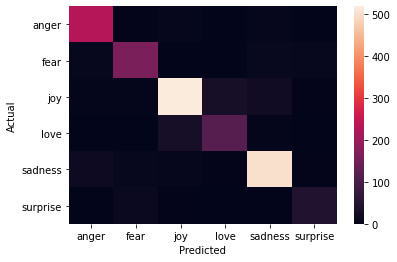

[Pipeline] ........... (step 1 of 3) Processing cleaner, total=   0.0s
[Pipeline] ........ (step 2 of 3) Processing vectorizer, total=   1.8s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=  31.6s



140
Accuracy: 0.8722222222222222
Predicted  anger  fear  joy  love  sadness  surprise
Actual                                              
anger        228     4    9     1        7         1
fear          10   161    2     1       12         8
joy            6     6  519    32       23         3
love           2     0   30   117        6         0
sadness       20    10    6     5      501         4
surprise       0    16    3     1        2        44


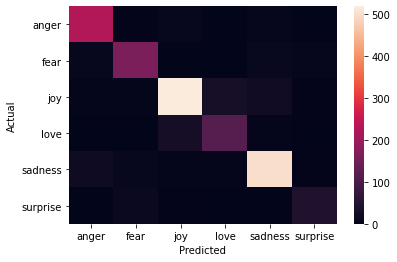

[Pipeline] ........... (step 1 of 3) Processing cleaner, total=   0.0s
[Pipeline] ........ (step 2 of 3) Processing vectorizer, total=   1.8s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=  33.7s



150
Accuracy: 0.8772222222222222
Predicted  anger  fear  joy  love  sadness  surprise
Actual                                              
anger        228     4    7     1        9         1
fear          11   165    0     2        8         8
joy            7     6  522    31       20         3
love           2     0   31   118        4         0
sadness       20    12    7     4      501         2
surprise       0    15    3     1        2        45


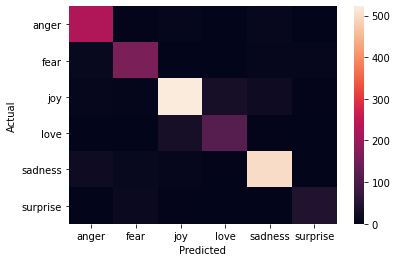

[Pipeline] ........... (step 1 of 3) Processing cleaner, total=   0.0s
[Pipeline] ........ (step 2 of 3) Processing vectorizer, total=   1.9s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=  36.1s



160
Accuracy: 0.8722222222222222
Predicted  anger  fear  joy  love  sadness  surprise
Actual                                              
anger        225     4   11     1        8         1
fear           8   164    3     1       11         7
joy            6     6  520    31       23         3
love           2     1   28   117        7         0
sadness       21    11    7     3      500         4
surprise       0    16    4     1        1        44


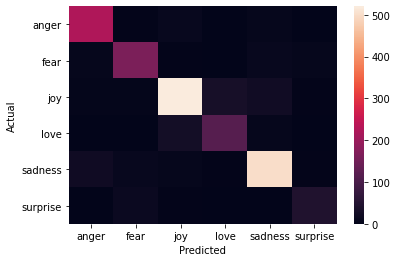

[Pipeline] ........... (step 1 of 3) Processing cleaner, total=   0.0s
[Pipeline] ........ (step 2 of 3) Processing vectorizer, total=   1.8s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=  38.3s



170
Accuracy: 0.8722222222222222
Predicted  anger  fear  joy  love  sadness  surprise
Actual                                              
anger        226     4    9     1       10         0
fear          12   159    2     1       10        10
joy            6     6  523    30       22         2
love           2     0   30   118        5         0
sadness       20     9   10     4      500         3
surprise       0    16    4     1        1        44


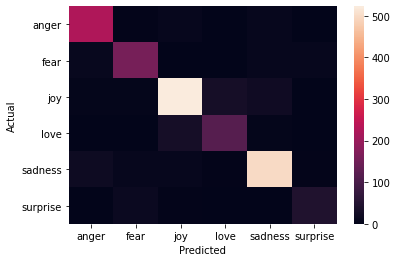

[Pipeline] ........... (step 1 of 3) Processing cleaner, total=   0.0s
[Pipeline] ........ (step 2 of 3) Processing vectorizer, total=   1.9s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=  40.8s



180
Accuracy: 0.8744444444444445
Predicted  anger  fear  joy  love  sadness  surprise
Actual                                              
anger        231     4    6     1        7         1
fear          11   158    1     1       13        10
joy            6     5  524    29       21         4
love           2     0   29   118        6         0
sadness       20    11    7     5      499         4
surprise       0    16    3     1        2        44


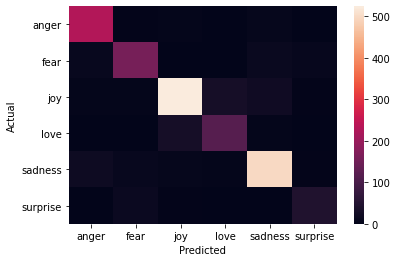

[Pipeline] ........... (step 1 of 3) Processing cleaner, total=   0.0s
[Pipeline] ........ (step 2 of 3) Processing vectorizer, total=   1.8s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=  42.5s



190
Accuracy: 0.8755555555555555
Predicted  anger  fear  joy  love  sadness  surprise
Actual                                              
anger        227     4    9     1        8         1
fear          11   161    2     1        9        10
joy            6     5  523    29       22         4
love           2     0   31   117        5         0
sadness       19    11    5     4      504         3
surprise       0    16    4     1        1        44


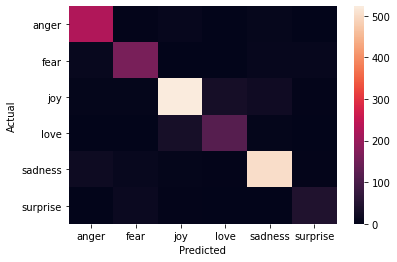

[[10, 0.865],
 [20, 0.8677777777777778],
 [30, 0.8705555555555555],
 [40, 0.8722222222222222],
 [50, 0.88],
 [60, 0.8733333333333333],
 [70, 0.875],
 [80, 0.8744444444444445],
 [90, 0.8738888888888889],
 [100, 0.8766666666666667],
 [110, 0.8788888888888889],
 [120, 0.8766666666666667],
 [130, 0.8761111111111111],
 [140, 0.8722222222222222],
 [150, 0.8772222222222222],
 [160, 0.8722222222222222],
 [170, 0.8722222222222222],
 [180, 0.8744444444444445],
 [190, 0.8755555555555555]]

In [144]:
Optimize_model()

In [76]:
def Models_test(model):
    clf = random
    pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow),
                 ('classifier', clf)], verbose=True)
    pipe.fit( X_train , y_train ) 
    sample_prediction = pipe.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, sample_prediction)
    result.append([i,accuracy])
    print('')
    print('')
    print('')
    print(i)
    print("Accuracy:",metrics.accuracy_score(y_test, sample_prediction))
    confusion_matrix = pd.crosstab(y_test, sample_prediction, rownames=['Actual'], colnames=['Predicted'])
    print(confusion_matrix)
    sns.heatmap(confusion_matrix)
    plt.show()

In [131]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis       

In [132]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import numpy as np
clf = MLPClassifier()

Models_test(clf)


[Pipeline] ........... (step 1 of 3) Processing cleaner, total=   0.0s
[Pipeline] ........ (step 2 of 3) Processing vectorizer, total=   1.9s


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[Pipeline] ........ (step 3 of 3) Processing classifier, total= 6.5min


NameError: ignored